# Fails
Some cases in which the Soft K-means algorthm implementation is bound to fail.

In [1]:
!rm -r CLUSTERING_ALGORITHMS
!git clone https://github.com/Q-b1t/CLUSTERING_ALGORITHMS.git

rm: cannot remove 'CLUSTERING_ALGORITHMS': No such file or directory
Cloning into 'CLUSTERING_ALGORITHMS'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 5), reused 19 (delta 3), pack-reused 0
Receiving objects: 100% (21/21), 4.89 KiB | 1.63 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
# Import dependencies
from CLUSTERING_ALGORITHMS.data_utils.clustering_data_utils import *
from CLUSTERING_ALGORITHMS.SOFT_K_MEAN_CLUSTERING.SoftKMeanClustering import *
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
All the clustering models will be created using the same hyperparameters.

In [3]:
K = 2 # number of desired clusters
MAX_ITERATIONS = 20 # number of centroid search iterations
RANDOM_COLORS = np.random.random((K,3)) # for plotting purposes

In [4]:
def plot_clustering_results(M,R,costs):
  colors = R.dot(RANDOM_COLORS)
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(costs)
  plt.title("Costs")
  plt.subplot(1,2,2)
  plt.scatter(X[:,0], X[:,1], c=colors)

# Case 1: Normal Clusters
Everything is good. The function is kinda hardcored to give 4 clusters (I may work on that later), but the result is overall acceptable.

[3729.8970478316487, 3514.0940720671306, 3352.484757451838, 3339.3885207293215, 3339.3434929941504, 3339.3291866205855, 3339.325947985217, 3339.3252816791514, 3339.3251476883815, 3339.3251208965476, 3339.3251155471075]


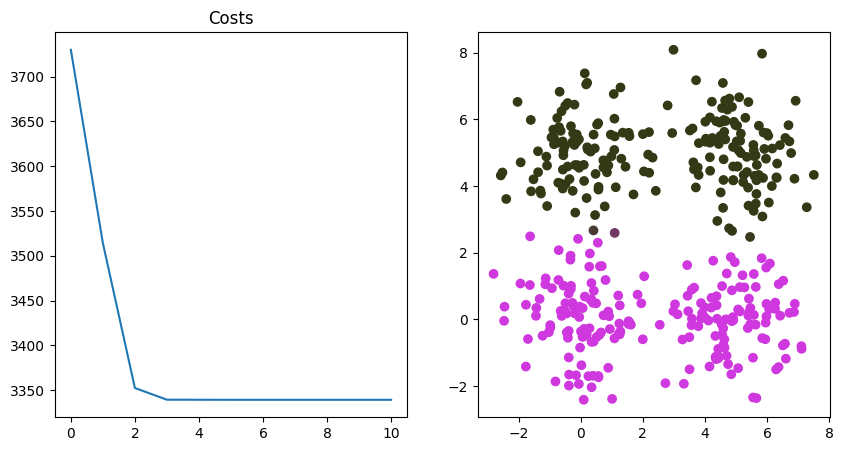

In [5]:
X,_ = get_sample_cluster_data(N=400)
model = SoftKMeansClustering(max_iterations=MAX_ITERATIONS)
M,R,costs = model.fit(X=X,K=K)
plot_clustering_results(M,R,costs)
print(costs)

# Case 2: Donut Problem
Since the cluster are circles, they do not follow the geometrical pattern of a distribution, and the algorithm fails to generalize to the propper centroids.

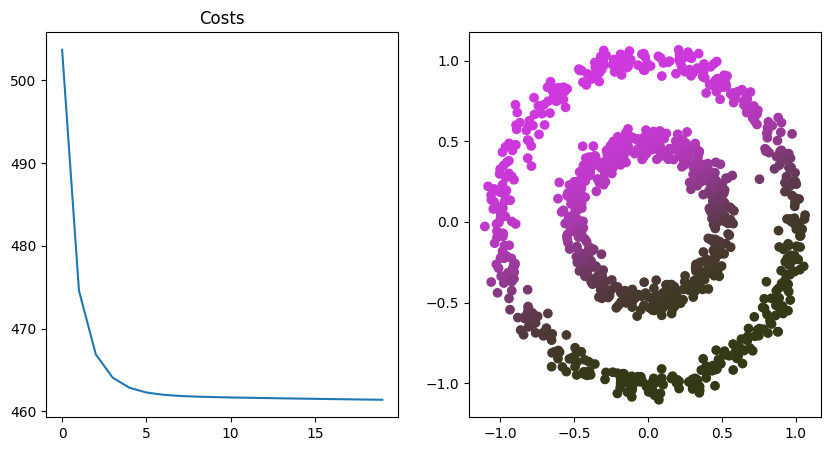

In [6]:
X = donut_clusters(cluster_number=K)
X /= K * 10 # normalize to keep the values between [0:1]
model = SoftKMeansClustering(max_iterations=MAX_ITERATIONS)
M,R,costs = model.fit(X=X,K=K)
colors = R.dot(RANDOM_COLORS)
plot_clustering_results(M,R,costs)

# Case 3:
In this case, a small sample of the dataset is sampled with a different density, therefore it has problems fingind the mean due to the difference in the sampling scale.

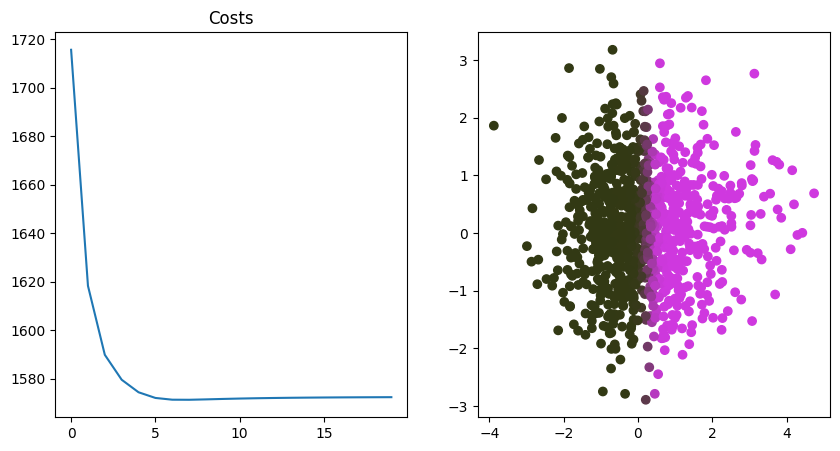

In [7]:
X = different_density_clusters()
#X /= K * 10 # normalize to keep the values between [0:1]
model = SoftKMeansClustering(max_iterations=MAX_ITERATIONS)
M,R,costs = model.fit(X=X,K=K)
colors = R.dot(RANDOM_COLORS)
plot_clustering_results(M,R,costs)

# Case 4: Sampling from different probabilities

Because the distributions have different paramters, the clustering model has problems detecting the centroids.

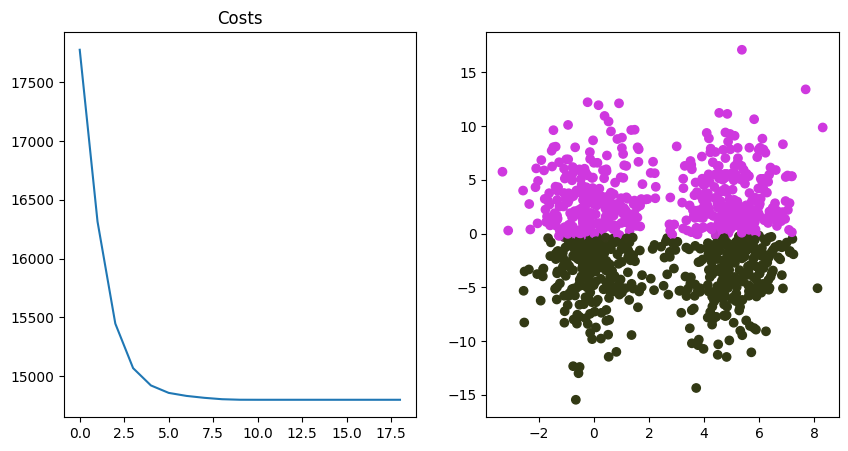

In [9]:
X = elongated_clusters(axis = 0)
#X /= K * 10 # normalize to keep the values between [0:1]
model = SoftKMeansClustering(max_iterations=MAX_ITERATIONS)
M,R,costs = model.fit(X=X,K=K)
colors = R.dot(RANDOM_COLORS)
plot_clustering_results(M,R,costs)

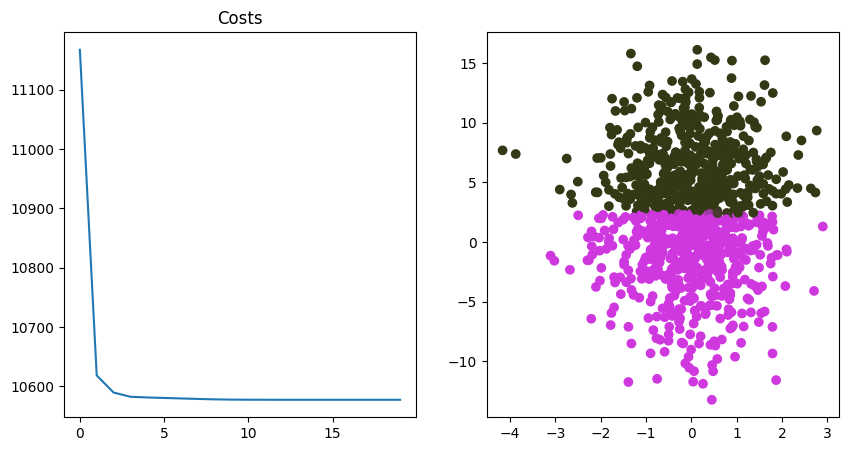

In [10]:
X = elongated_clusters(axis = 1)
#X /= K * 10 # normalize to keep the values between [0:1]
model = SoftKMeansClustering(max_iterations=MAX_ITERATIONS)
M,R,costs = model.fit(X=X,K=K)
colors = R.dot(RANDOM_COLORS)
plot_clustering_results(M,R,costs)